#Task:-1  

To Explore Supervised Machine Learning

#Linear Regression with Python Scikit Learn 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 


Q:- What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
#importing required labraries to solve the problem

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Data set 

In [2]:
path = "http://bit.ly/w-data"
df = pd.read_csv(path)
print('data imported Successfully ')
df.head()                                                  #printing 1st rows of data 

data imported Successfully 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape                  #shows the total  rows and columns of the data 

(25, 2)

Getting information of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()                                 #this line shows max min and etc values about the data set 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


checking Null Values in the data set

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Plotting Distribution of SCORES

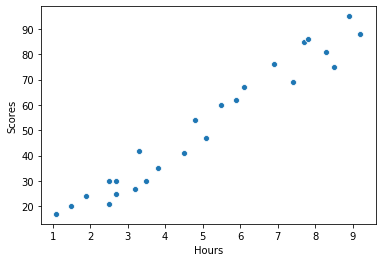

In [7]:
#showing scatter plot of dependent and indepedent variable

sns.scatterplot(x = 'Hours', y = 'Scores', data = df)

As we can see there is a linear relation between number of hours studied and percentage of score


Preparing the data

In [8]:
X = df[['Hours']].values
y = df[['Scores']].values

Splitting the data into train and test sets using Scikit-Learn 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=0)

Traning the algorithm

In [10]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train, y_train)


print("Traning completed")

Traning completed


Text(0, 0.5, 'Scores')

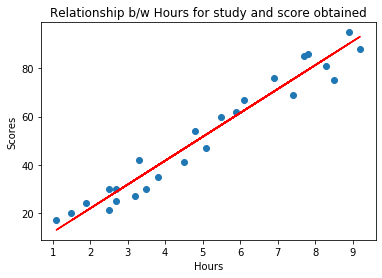

In [11]:
#Plotting the regression line
line = reg.coef_*X + reg.intercept_ 

#plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color = 'red')
plt.title("Relationship b/w Hours for study and score obtained")
plt.xlabel('Hours')
plt.ylabel('Scores')

Making predction

In [12]:
p = reg.score(X_train, y_train)
print("Traning score is :- {}".format(p))
q = reg.score(X_test, y_test)
print("Test score is :- {}".format(q))

Traning score is :- 0.9515510725211553
Test score is :- 0.9454906892105356


In [13]:
print(X_test)
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
#comparing actual and Predicted 
df1 = pd.DataFrame(np.c_[X_test, y_test , y_pred], columns = ["study hours", "student original marks", "student predctied marks"])
df1

,study hours,student original marks,student predctied marks
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [15]:
#testing by our own data

pred = reg.predict([[9.25]])
print("No of Hours studied = ", 9.25)
print("Predctied Score = {}".format(pred))

No of Hours studied =  9.25
Predctied Score = [[93.69173249]]


Evaluating the model

In [16]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  4.183859899002975
MSE:  21.5987693072174
MAE:  4.6474476121003665
